## Fixed Point Iteration

Fixed point iteration is a numerical method used to find solutions to equations of the form \( x = g(x) \), where \( g \) is a function.

## Steps

1. **Choose a Function**: Define $ g(x) $ such that $ x = g(x) $ has a fixed point.
2. **Initial Guess**: Select an initial guess $ x_0 $.
3. **Iterate**: Compute subsequent values using:
   $x_{n+1} = g(x_n)$
   Continue until $ |x_{n+1} - x_n| < \epsilon $.
4. **Convergence Check**: Ensure the function meets conditions for convergence, typically that $ |g'(x)| < 1 $ near the fixed point.


### Example

$f(x) = 2x^3 - 2x -5$

$x = g(x) = \sqrt[3]{(\frac{2x +5}{2})}$

Root: 1.6005892555955437 with 6 iterations.
1.6005892555955437


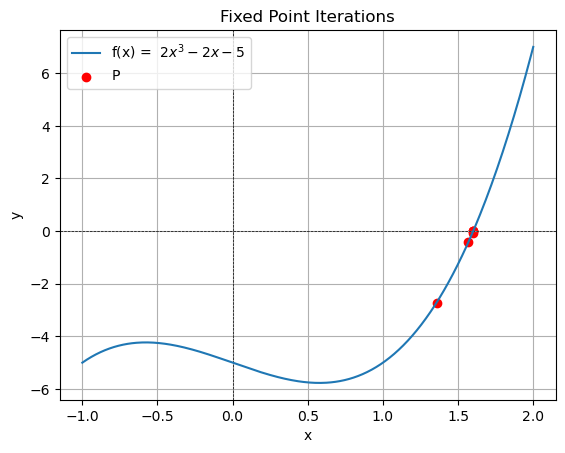

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# f(x) = 2*x**3 - 2*x - 5 = 0
f = lambda x: 2*x**3 - 2*x -5

g = lambda x: ((2*x + 5) / 2)**(.1 / .3)

p_arr = []

TOL = 0.0001
# max iterations
N = 100
i = 1
# guess p0
p0 = 0
# initializing p with zero
p = 0
while i <= N:
    p = g(p0)
    p_arr.append(p)
    if abs(p-p0) < TOL:
        print(f"Root: {p} with {i} iterations.")
        print(p)
        break;
    i = i + 1
    p0 = p

else:
    print(f"The method failed after {N} iterations")



x_graph = np.linspace(-1,2,400)
y_graph = f(x_graph)

plt.figure()
plt.title("Fixed Point Iterations")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.plot(x_graph, y_graph, label="f(x) =  $2x^3 - 2x -5$")

np_p = np.array(p_arr)
plt.scatter(np_p, f(np_p), label="P", color="red")

plt.legend()
plt.grid()
plt.show()



## Newton's Method
Newton's method (or the Newton-Raphson method) is a numerical technique used to find approximate solutions to equations of the form $ f(x) = 0 $.

### Steps

1. **Choose a Function**: Define the function $ f(x) $ whose root you want to find.
2. **Initial Guess**: Select an initial guess $ x_0 $.
3. **Iterate**: Compute subsequent approximations using the formula:
   $$
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
   $$
   Continue iterating until the change is sufficiently small, typically $ |x_{n+1} - x_n| < \epsilon $.
4. **Convergence Check**: Verify that the function $ f $ and its derivative $ f' $ are continuous and that $ f'(x_n) \neq 0 $ at the iterations.

### Example
To solve $ x^2 - 2 = 0 $:
1. Define $ f(x) = x^2 - 2 $ and $ f'(x) = 2x $.
2. Start with $ x_0 = 1 $.
3. Iterate:
   - $ x_1 = 1 - \frac{f(1)}{f'(1)} = 1 - \frac{-1}{2} = 1.5 $
   - $ x_2 = 1.5 - \frac{f(1.5)}{f'(1.5)} \approx 1.4167 $
   - Continue until values stabilize.


Root found: 1.4142135623730951


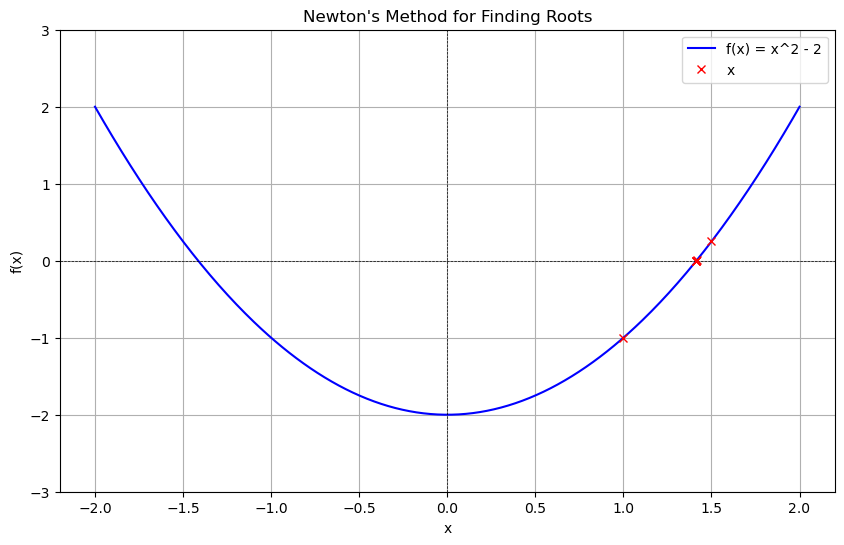

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
f = lambda x: x**2 - 2
df = lambda x: 2 * x

# Initial guess
x0 = 1.0
TOL = 1e-7
N = 100

# List to store x values for plotting
x_values = [x0]

# Iteration
for n in range(N):
    f_x0 = f(x0)
    df_x0 = df(x0)

    if df_x0 == 0:
        print("Derivative is zero. No solution found.")
        break

    # Update the approximation
    x1 = x0 - f_x0 / df_x0

    # Store the x value
    x_values.append(x1)

    # Check for convergence
    if abs(x1 - x0) < TOL:
        print(f"Root found: {x1}")
        break

    x0 = x1
else:
    print("Maximum iterations reached. No solution found.")

# Plotting
x_range = np.linspace(-2, 2, 400)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='f(x) = x^2 - 2', color='blue')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')

# Mark the iterations
x_np = np.array(x_values)
plt.plot(x_np, f(x_np), 'rx', label="x")

plt.title("Newton's Method for Finding Roots")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.ylim(-3, 3)
plt.show()
